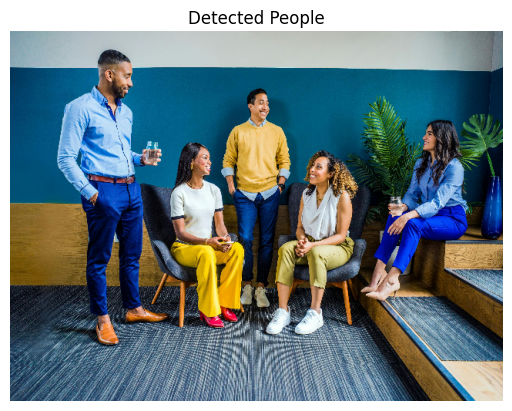

Detected 0 people.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_people(image_path):
    """
    Detect people in an image using traditional computer vision techniques.

    Args:
        image_path (str): Path to the input image.

    Returns:
        list: List of bounding boxes for detected people.
    """
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Image not found.")
        return []

    # Resize the image for faster processing
    img_resized = cv2.resize(img, (640, 480))

    # Convert to grayscale
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use background subtraction (MOG2)
    bg_subtractor = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50)
    fg_mask = bg_subtractor.apply(blurred)

    # Apply morphological operations to clean up the mask
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    cleaned_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, kernel)

    # Find contours in the mask
    contours, _ = cv2.findContours(cleaned_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours to detect people
    bounding_boxes = []
    for contour in contours:
        if cv2.contourArea(contour) < 500:  # Filter small contours
            continue

        # Get bounding box
        x, y, w, h = cv2.boundingRect(contour)

        # Filter based on aspect ratio (human-like shapes)
        aspect_ratio = h / float(w)
        if 1.5 < aspect_ratio < 4.0:  # Typical aspect ratio for humans
            bounding_boxes.append((x, y, w, h))
            cv2.rectangle(img_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the result
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Detected People")
    plt.show()

    return bounding_boxes

# Path to the image
image_path = "people.jpg"

# Detect people
bounding_boxes = detect_people(image_path)
print(f"Detected {len(bounding_boxes)} people.")